In [9]:
import pandas as pd
import numpy as np

In [58]:
df = pd.read_csv("train.csv/train.csv")
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df = np.array(df)

In [60]:
np.random.shuffle(df)

In [61]:
m,n = df.shape
data_dev = df[0:1000].T
y_dev = data_dev[0]
x_dev = data_dev[1:n]
x_dev = x_dev /255

data_train = df[1000:m].T
y_train = data_train[0]
x_train = data_train[1:n]
x_train = x_train /255


In [70]:
def init_params():
    w1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    w2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return w1, b1, w2, b2

def ReLU(z):
    return np.maximum(0, z)

def softmax(z):
    a = np.exp(z)/ sum(np.exp(z))
    return a
    
def forward_prop(w1, b1, w2, b2, x):
    z1 = w1.dot(x) + b1
    a1 = ReLU(z1)
    z2 = w2.dot(a1) + b2
    a2 = softmax(z2)

    return z1, a1, z2, a2

def one_hot_encode(y):
    one_hot_y = np.zeros((y.size, y.max() + 1))
    one_hot_y[np.arange(y.size), y] = 1
    one_hot_y = one_hot_y.T
    return one_hot_y

def derive_relu(z):
    return z > 0 


def back_prop(z1, a1, z2, a2, w2,x, y):
    one_hot_y = one_hot_encode(y)
    dz2 = a2 - one_hot_y
    dw2 = 1/m * dz2.dot(a1.T)
    db2 = 1/m * np.sum(dz2)
    dz1 = w2.T.dot(dz2) * derive_relu(z1)
    dw1 = 1/m * dz1.dot(x.T)
    db1 = 1/m * np.sum(dz1)

    return dw1, db1, dw2, db2

def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
    w1 = w1 - alpha * dw1
    b1 = b1 - alpha * db1
    w2 = w2 - alpha * dw2
    b2 = b2 - alpha * db2

    return w1, b1, w2, b2


In [71]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(x, y, iteration, alpha):
    w1, b1, w2, b2 = init_params()
    for i in range(iteration):
        z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, x)
        dw1, db1, dw2, db2 = back_prop(z1, a1, z2, a2, w2, x, y)
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)
        if i % 50 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(a2)
            print(get_accuracy(predictions, y))

    return w1, b1, w2, b2

In [89]:
w1, b1, w2, b2 = gradient_descent(x_train, y_train, 1000, 0.1)

Iteration:  0
[2 4 2 ... 1 2 2] [8 2 7 ... 5 4 5]
0.10168292682926829
Iteration:  50
[8 0 7 ... 3 4 4] [8 2 7 ... 5 4 5]
0.4756341463414634
Iteration:  100
[7 0 7 ... 3 4 4] [8 2 7 ... 5 4 5]
0.6335121951219512
Iteration:  150
[7 0 7 ... 3 4 5] [8 2 7 ... 5 4 5]
0.7143658536585366
Iteration:  200
[7 0 7 ... 3 4 5] [8 2 7 ... 5 4 5]
0.7602439024390244
Iteration:  250
[8 0 7 ... 3 4 5] [8 2 7 ... 5 4 5]
0.790609756097561
Iteration:  300
[8 2 7 ... 3 4 5] [8 2 7 ... 5 4 5]
0.8096341463414635
Iteration:  350
[8 2 7 ... 3 4 5] [8 2 7 ... 5 4 5]
0.8232682926829268
Iteration:  400
[8 2 7 ... 3 4 5] [8 2 7 ... 5 4 5]
0.8330731707317073
Iteration:  450
[8 2 7 ... 3 4 5] [8 2 7 ... 5 4 5]
0.8413170731707317
Iteration:  500
[8 2 7 ... 3 4 5] [8 2 7 ... 5 4 5]
0.8472439024390244
Iteration:  550
[8 2 7 ... 3 4 5] [8 2 7 ... 5 4 5]
0.8527317073170732
Iteration:  600
[8 2 7 ... 3 4 5] [8 2 7 ... 5 4 5]
0.8579024390243902
Iteration:  650
[8 2 7 ... 3 4 5] [8 2 7 ... 5 4 5]
0.861390243902439
Iteration:

In [90]:
def make_predictions(x, w1, b1, w2, b2):
    _, _, _, A2 = forward_prop(w1, b1, w2, b2, x)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, w1, b1, w2, b2):
    current_image = x_train[:, index, None]
    prediction = make_predictions(x_train[:, index, None], w1, b1, w2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [5]
Label:  5


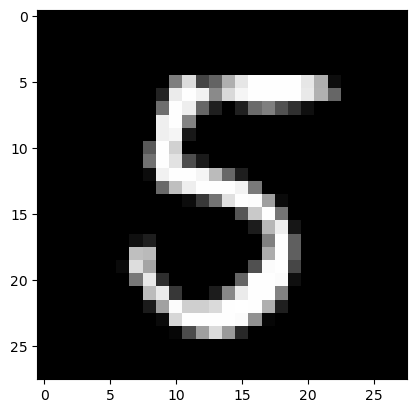

Prediction:  [6]
Label:  6


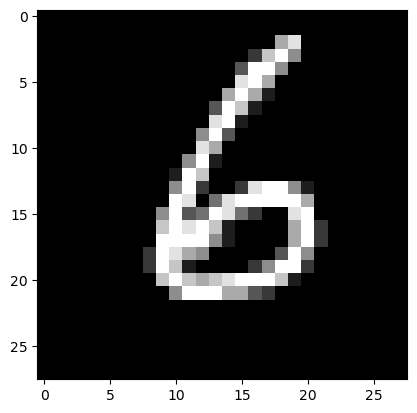

In [91]:
import matplotlib.pyplot as plt
test_prediction(5, w1, b1, w2, b2)
test_prediction(174, w1, b1, w2, b2)


dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)



In [92]:
dev_predictions = make_predictions(x_dev, w1, b1, w2, b2)
get_accuracy(dev_predictions, y_dev)

[9 9 9 7 7 8 3 6 6 4 9 6 6 6 1 5 2 3 2 2 1 0 0 9 3 3 0 9 7 9 4 9 0 0 1 8 9
 2 1 2 8 7 7 7 9 1 2 1 1 5 6 2 6 9 8 8 5 2 7 6 5 1 9 7 3 4 1 1 5 8 6 8 9 8
 1 6 1 3 0 1 1 2 6 8 3 4 5 9 5 3 7 7 3 0 1 4 3 4 7 1 6 9 1 1 3 4 6 6 8 4 2
 7 5 6 1 6 5 3 7 2 3 6 1 9 5 1 9 6 1 3 1 7 7 1 3 9 9 1 8 6 1 3 2 4 0 9 2 2
 8 6 7 4 9 8 8 1 3 6 9 1 9 5 8 7 2 2 1 3 8 3 7 6 0 0 4 3 6 1 5 6 9 8 1 0 2
 7 8 8 4 2 3 2 2 2 1 1 1 0 1 6 2 5 5 7 3 8 6 6 7 2 1 1 9 7 2 8 6 8 4 2 6 7
 4 2 8 7 2 0 1 2 8 4 3 2 1 5 3 8 1 3 0 1 2 5 7 2 6 2 6 1 0 3 3 0 6 0 8 6 5
 2 1 3 8 9 4 6 8 5 9 8 1 8 9 7 8 5 0 7 2 9 6 0 5 9 6 0 6 8 2 9 8 0 3 2 2 6
 7 9 2 5 6 2 8 9 3 2 9 7 7 1 7 7 9 4 1 3 9 1 3 5 2 1 0 5 4 3 8 9 8 9 2 6 3
 7 0 5 9 5 4 3 0 3 3 9 8 7 1 1 2 8 9 5 9 7 3 8 6 8 8 3 6 8 7 6 1 9 2 5 7 0
 6 6 6 3 5 5 0 1 9 7 9 2 3 2 0 4 2 2 9 6 8 8 4 4 6 3 9 1 8 3 3 5 0 9 2 5 0
 0 1 0 8 1 4 7 0 0 7 6 5 1 7 6 4 8 4 4 5 1 6 2 0 9 8 7 3 2 0 5 2 2 2 8 6 2
 8 8 4 2 5 8 7 2 9 6 0 4 5 4 7 5 6 8 7 4 4 1 7 9 3 0 4 2 9 7 7 5 0 4 5 2 1
 4 8 0 9 1 7 3 3 5 4 0 7 

0.89